In [284]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import joblib

1. Caricamento Dati
2. Controllo e gestione dati mancanti, outlier, inconsistenze (normalmente i dati sono già tutti ok
perché provengono da database)
3. Divisione in set di training e set di valutazione
4. Analisi esplorativa (indici statistici vari)
5. Trovare correlazioni fra le variabili
6. Normalizzazione variabili
7. Scelta algoritmo e ricerca dei migliori parametri e salvataggio del modello su file
8. Valutazione modello

In [285]:
#1 caricamento dati 
df= pd.read_excel("C:\\ex\\ProjectWork\\DataSetTestTraining44000.xlsx")
df.to_csv("C:\\ex\\ProjectWork\\DataSetTestTraining44000.csv", index=False)

In [286]:
df

,Eta,Sesso,TitoloStudio,RedditoLordoUltimoAnno,AnniEsperienzaLavorativa,InformazioniImmobile,ImportoRichiesto,ScopoFinanziamento,TassoInteresseFinanziamento,ImportoRichiestoDivisoReddito,DurataDellaStoriaCreditiziaInAnni,AffidabilitàCreditizia,InadempienzeFinanziamentiPrecedenti,FinanziamentoApprovato
0,22,F,Laurea,71948,0,Affitto,35000,Personale,16.02,0.49,3,561,NO,SI
1,21,F,Diploma,12282,0,ProprietàMutuoEstinto,1000,Formazione,11.14,0.08,2,504,SI,NO
2,25,F,Diploma,12438,3,ProprietàMutuoDaEstinguere,5500,Medico,12.87,0.44,3,635,NO,SI
3,23,F,Laurea,79753,0,Affitto,35000,Medico,15.23,0.44,2,675,NO,SI
4,24,M,Laurea,66135,1,Affitto,35000,Medico,14.27,0.53,4,586,NO,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43995,25,M,Diploma,44442,2,Affitto,2577,RistrutturazioneCasa,1.59,0.06,4,659,NO,SI
43996,30,M,Diploma,51558,9,Affitto,14750,Personale,11.01,0.29,8,702,NO,SI
43997,30,M,Laurea,37218,6,Affitto,14125,Medico,14.45,0.38,10,657,NO,SI
43998,29,F,Laurea,42803,6,Affitto,5000,Medico,14.76,0.12,9,650,NO,SI


In [287]:
# 2. Controllo e gestione dati mancanti, outlier, inconsistenze (normalmente i dati sono già tutti ok perché provengono da database)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44000 entries, 0 to 43999
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Eta                                  44000 non-null  int64  
 1   Sesso                                44000 non-null  object 
 2   TitoloStudio                         44000 non-null  object 
 3   RedditoLordoUltimoAnno               44000 non-null  int64  
 4   AnniEsperienzaLavorativa             44000 non-null  int64  
 5   InformazioniImmobile                 44000 non-null  object 
 6   ImportoRichiesto                     44000 non-null  int64  
 7   ScopoFinanziamento                   44000 non-null  object 
 8   TassoInteresseFinanziamento          44000 non-null  float64
 9   ImportoRichiestoDivisoReddito        44000 non-null  float64
 10  DurataDellaStoriaCreditiziaInAnni    44000 non-null  int64  
 11  AffidabilitàCreditizia      

In [288]:
df.shape

(44000, 14)

In [289]:
print(df["ScopoFinanziamento"].unique())

['Personale' 'Formazione' 'Medico' 'InizioAttivitaImprenditoriale'
 'RistrutturazioneCasa' 'RistrutturazioneAltriDebiti']


In [290]:
#outliers
numeric_df = df.select_dtypes(include='number')
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

outliers = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))
df_outliers = df[outliers.any(axis=1)]
print("Outliers detected:")

Outliers detected:


In [291]:
#non ci sono valori mancanti crazy follia
print(f"Valori mancanti per colonna:")
print(df.isnull().sum())

Valori mancanti per colonna:
Eta                                    0
Sesso                                  0
TitoloStudio                           0
RedditoLordoUltimoAnno                 0
AnniEsperienzaLavorativa               0
InformazioniImmobile                   0
ImportoRichiesto                       0
ScopoFinanziamento                     0
TassoInteresseFinanziamento            0
ImportoRichiestoDivisoReddito          0
DurataDellaStoriaCreditiziaInAnni      0
AffidabilitàCreditizia                 0
InadempienzeFinanziamentiPrecedenti    0
FinanziamentoApprovato                 0
dtype: int64


In [292]:
df = pd.get_dummies(df, columns=['InformazioniImmobile', 'ScopoFinanziamento'])
df

,Eta,Sesso,TitoloStudio,RedditoLordoUltimoAnno,AnniEsperienzaLavorativa,ImportoRichiesto,TassoInteresseFinanziamento,ImportoRichiestoDivisoReddito,DurataDellaStoriaCreditiziaInAnni,AffidabilitàCreditizia,...,FinanziamentoApprovato,InformazioniImmobile_Affitto,InformazioniImmobile_ProprietàMutuoDaEstinguere,InformazioniImmobile_ProprietàMutuoEstinto,ScopoFinanziamento_Formazione,ScopoFinanziamento_InizioAttivitaImprenditoriale,ScopoFinanziamento_Medico,ScopoFinanziamento_Personale,ScopoFinanziamento_RistrutturazioneAltriDebiti,ScopoFinanziamento_RistrutturazioneCasa
0,22,F,Laurea,71948,0,35000,16.02,0.49,3,561,...,SI,True,False,False,False,False,False,True,False,False
1,21,F,Diploma,12282,0,1000,11.14,0.08,2,504,...,NO,False,False,True,True,False,False,False,False,False
2,25,F,Diploma,12438,3,5500,12.87,0.44,3,635,...,SI,False,True,False,False,False,True,False,False,False
3,23,F,Laurea,79753,0,35000,15.23,0.44,2,675,...,SI,True,False,False,False,False,True,False,False,False
4,24,M,Laurea,66135,1,35000,14.27,0.53,4,586,...,SI,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43995,25,M,Diploma,44442,2,2577,1.59,0.06,4,659,...,SI,True,False,False,False,False,False,False,False,True
43996,30,M,Diploma,51558,9,14750,11.01,0.29,8,702,...,SI,True,False,False,False,False,False,True,False,False
43997,30,M,Laurea,37218,6,14125,14.45,0.38,10,657,...,SI,True,False,False,False,False,True,False,False,False
43998,29,F,Laurea,42803,6,5000,14.76,0.12,9,650,...,SI,True,False,False,False,False,True,False,False,False


In [293]:
print(df["TitoloStudio"].unique())
print(df["Sesso"].unique())
print(df["InadempienzeFinanziamentiPrecedenti"].unique())
print(df["FinanziamentoApprovato"].unique())

['Laurea' 'Diploma' 'Dottorato di ricerca']
['F' 'M']
['NO' 'SI']
['SI' 'NO']


In [294]:
#mappature variabili cateporiche
mapping = {
    "Diploma": 0,
    "Laurea": 1,
    "Dottorato di ricerca": 2
}

# mappatura titolo_studio_cod
df["TitoloStudio"] = df["TitoloStudio"].map(mapping)

In [295]:
mapping_sesso = {
    "F": 0,
    "M": 1,
}

# mappatura Sesso 
df["Sesso"] = df["Sesso"].map(mapping_sesso)

In [296]:
mapping_Nevio = {
    "NO": 0,
    "SI": 1,
}

# mappatura inadempienza
df["InadempienzeFinanziamentiPrecedenti"] = df["InadempienzeFinanziamentiPrecedenti"].map(mapping_Nevio)

In [297]:
mapping_approved = {
    "NO": 0,
    "SI": 1,
}

# mappatura label target
df["FinanziamentoApprovato"] = df["FinanziamentoApprovato"].map(mapping_approved)

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44000 entries, 0 to 43999
Data columns (total 21 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Eta                                               44000 non-null  int64  
 1   Sesso                                             44000 non-null  int64  
 2   TitoloStudio                                      44000 non-null  int64  
 3   RedditoLordoUltimoAnno                            44000 non-null  int64  
 4   AnniEsperienzaLavorativa                          44000 non-null  int64  
 5   ImportoRichiesto                                  44000 non-null  int64  
 6   TassoInteresseFinanziamento                       44000 non-null  float64
 7   ImportoRichiestoDivisoReddito                     44000 non-null  float64
 8   DurataDellaStoriaCreditiziaInAnni                 44000 non-null  int64  
 9   AffidabilitàCredi

In [299]:
#3. Divisione in set di training e set di valutazione
#dopo

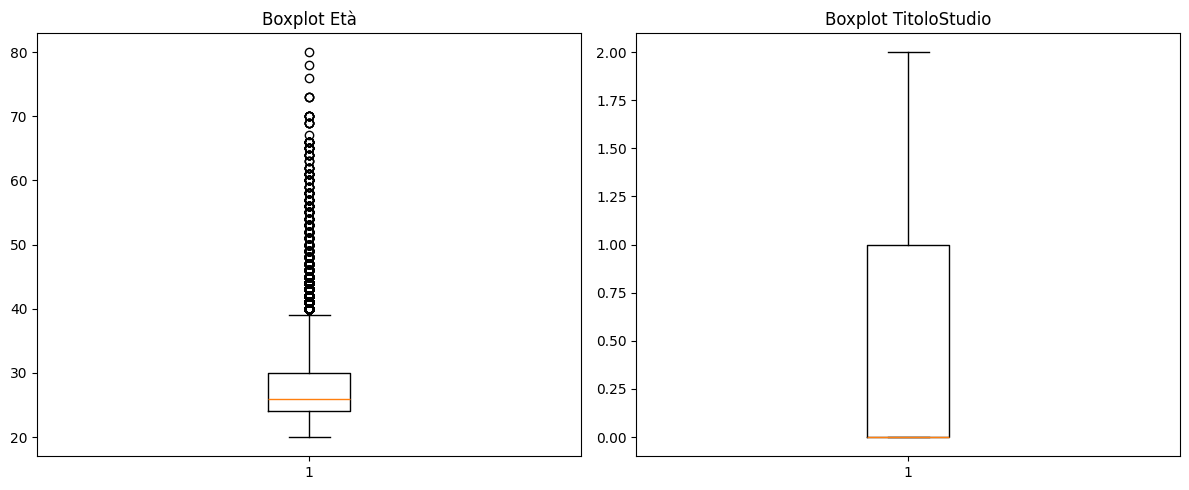

In [300]:
#4. Analisi esplorativa (indici statistici vari)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.boxplot(df['Eta'])
plt.title('Boxplot Età')

plt.subplot(1, 2, 2)
plt.boxplot(df['TitoloStudio'])
plt.title('Boxplot TitoloStudio')

plt.tight_layout()
plt.show()

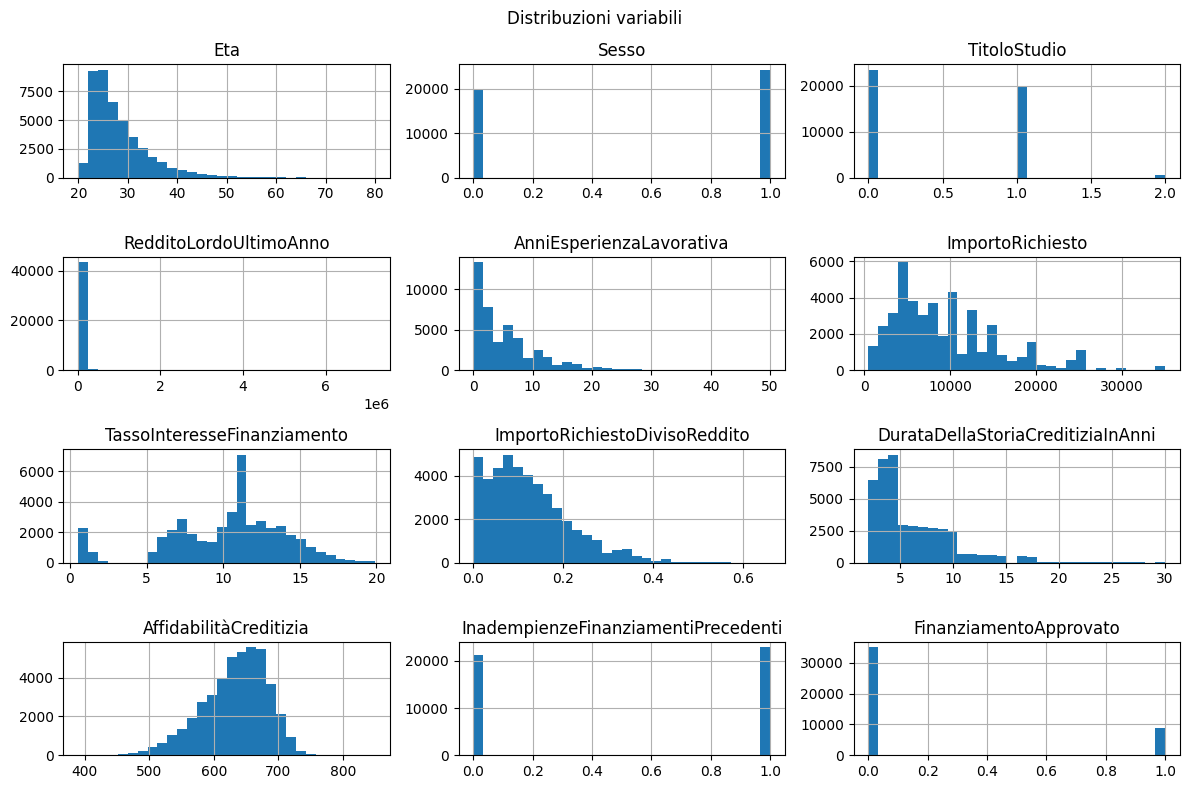

In [301]:
df.hist(bins=30, figsize=(12, 8))
plt.suptitle("Distribuzioni variabili")
plt.tight_layout()
plt.show()


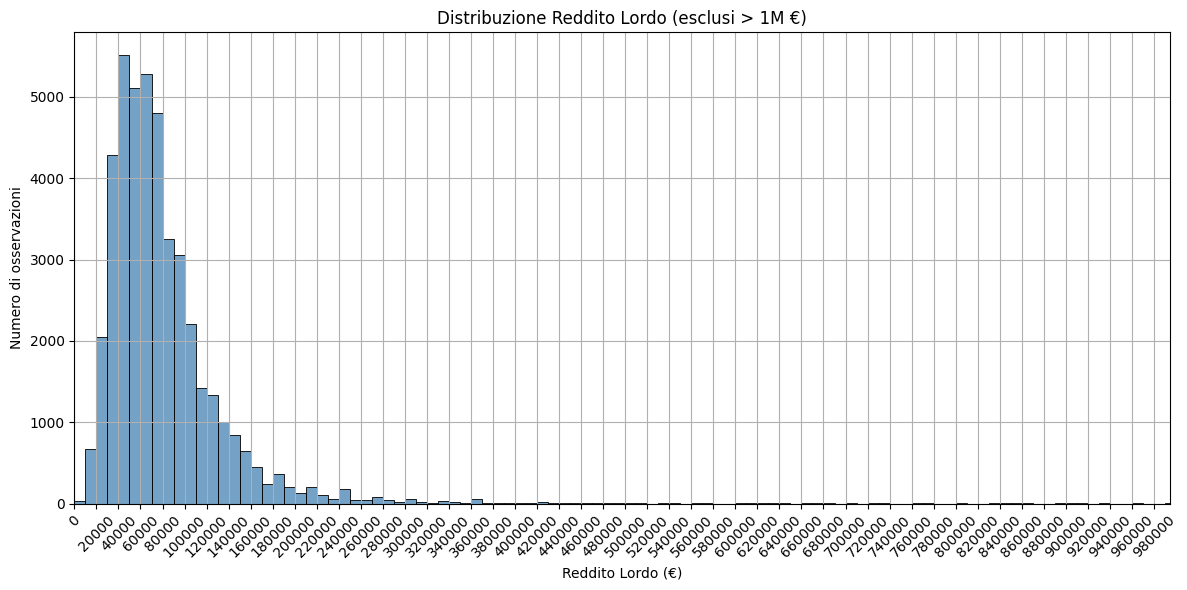

In [302]:
#approfondimento variabile Reddito Lordo
# esclusione valori sopra 1 ml
df_filtered = df[df["RedditoLordoUltimoAnno"] <= 1_000_000]

#max e bin da 10k
max_value = df_filtered["RedditoLordoUltimoAnno"].max()
bin_width = 10_000
bins = np.arange(0, max_value + bin_width, bin_width)

# Istogramma
plt.figure(figsize=(12, 6))
sns.histplot(df_filtered["RedditoLordoUltimoAnno"], bins=bins, color='steelblue', edgecolor='black')

plt.title("Distribuzione Reddito Lordo (esclusi > 1M €)")
plt.xlabel("Reddito Lordo (€)")
plt.ylabel("Numero di osservazioni")
plt.xticks(bins[::2], rotation=45)  # etichette ogni 2 bin per leggibilità
plt.xlim(0, max_value)
plt.grid(True)
plt.tight_layout()
plt.show()

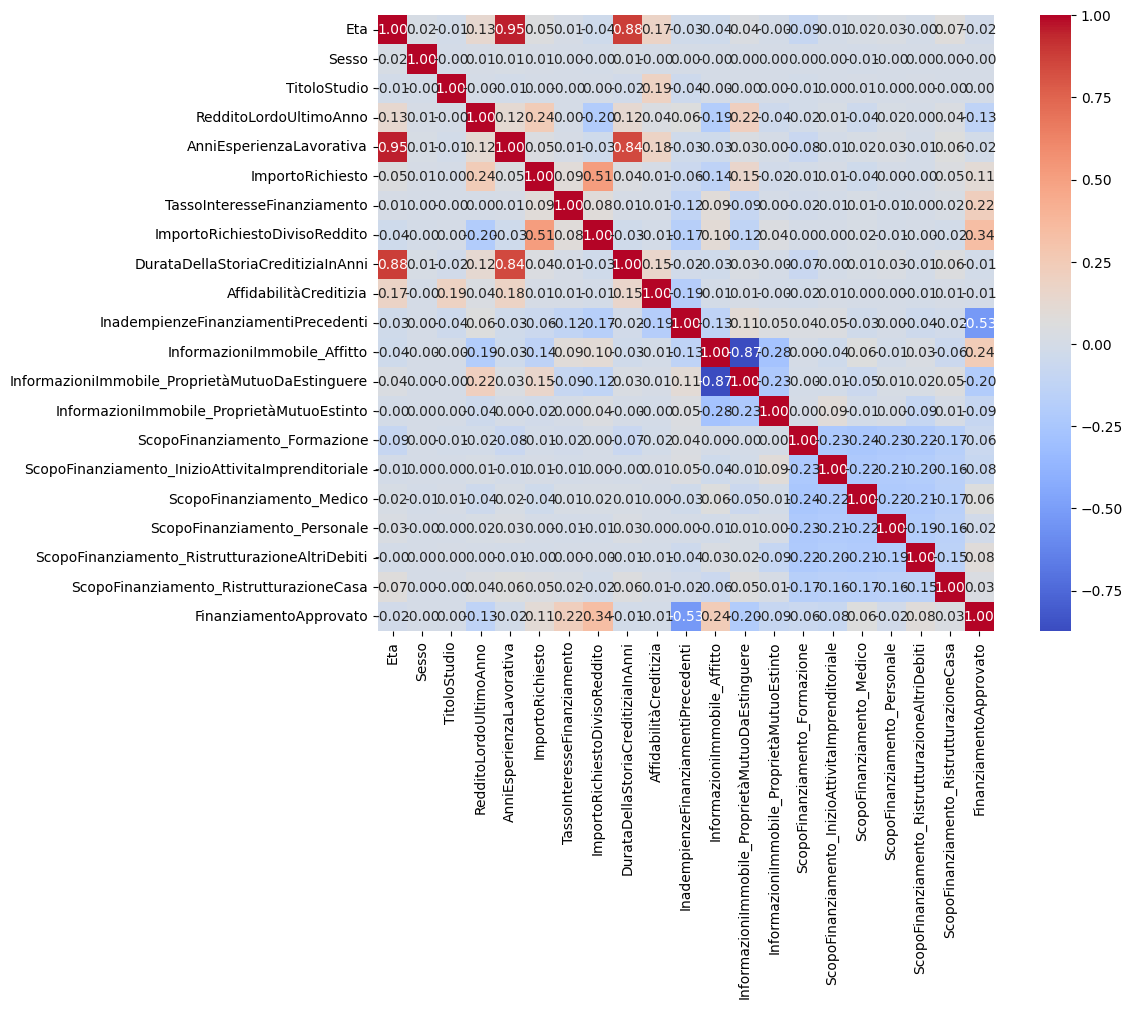

In [303]:
#5. Trovare correlazioni fra le variabili
col = "FinanziamentoApprovato"

# Rimuovi la colonna e aggiungila in fondo
df = df[[c for c in df.columns if c != col] + [col]]
correlation_matrix = df.corr()
correlation_matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.show()

In [304]:
df.columns

Index(['Eta', 'Sesso', 'TitoloStudio', 'RedditoLordoUltimoAnno',
       'AnniEsperienzaLavorativa', 'ImportoRichiesto',
       'TassoInteresseFinanziamento', 'ImportoRichiestoDivisoReddito',
       'DurataDellaStoriaCreditiziaInAnni', 'AffidabilitàCreditizia',
       'InadempienzeFinanziamentiPrecedenti', 'InformazioniImmobile_Affitto',
       'InformazioniImmobile_ProprietàMutuoDaEstinguere',
       'InformazioniImmobile_ProprietàMutuoEstinto',
       'ScopoFinanziamento_Formazione',
       'ScopoFinanziamento_InizioAttivitaImprenditoriale',
       'ScopoFinanziamento_Medico', 'ScopoFinanziamento_Personale',
       'ScopoFinanziamento_RistrutturazioneAltriDebiti',
       'ScopoFinanziamento_RistrutturazioneCasa', 'FinanziamentoApprovato'],
      dtype='object')

In [305]:
#punto 3 divisione in train e test
X = df.drop(columns=['FinanziamentoApprovato'])
y = df['FinanziamentoApprovato']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 


print(f"Dimensioni X_train: {X_train.shape}")
print(f"Dimensioni X_test: {X_test.shape}")
print(f"Dimensioni y_train: {y_train.shape}")
print(f"Dimensioni y_test: {y_test.shape}")

Dimensioni X_train: (35200, 20)
Dimensioni X_test: (8800, 20)
Dimensioni y_train: (35200,)
Dimensioni y_test: (8800,)


In [306]:
# 6. Normalizzazione variabili e Analisi Range Training Set

from sklearn.preprocessing import MinMaxScaler
import numpy as np # Assicurati che numpy sia importato
import joblib # Per salvare i training_bounds

# --- PASSO PRELIMINARE: Verifica che 'ImportoRichiestoDivisoReddito' esista ---
# Questa colonna DOVREBBE GIA' ESISTERE in X_train e X_test se era nel df originale.
# Il codice seguente è solo un fallback se non esistesse e dovesse essere calcolata qui.
# NEL TUO CASO, BASANDOTI SUL FLUSSO DEL NOTEBOOK, QUESTA PARTE PUO' RIMANERE COMMENTATA.
#
# if 'ImportoRichiestoDivisoReddito' not in X_train.columns:
#     print("ATTENZIONE: Calcolo 'ImportoRichiestoDivisoReddito' al volo per X_train e X_test.")
#     # Calcolo per X_train
#     X_train_temp_ratio = X_train.copy()
#     X_train_temp_ratio['ImportoRichiestoDivisoReddito'] = np.where(
#         X_train_temp_ratio['RedditoLordoUltimoAnno'] > 0,
#         X_train_temp_ratio['ImportoRichiesto'] / X_train_temp_ratio['RedditoLordoUltimoAnno'],
#         0 # Gestione divisione per zero, o potresti mettere np.nan e gestire dopo
#     )
#     X_train = X_train_temp_ratio
# 
#     # Calcolo per X_test
#     X_test_temp_ratio = X_test.copy()
#     X_test_temp_ratio['ImportoRichiestoDivisoReddito'] = np.where(
#         X_test_temp_ratio['RedditoLordoUltimoAnno'] > 0,
#         X_test_temp_ratio['ImportoRichiesto'] / X_test_temp_ratio['RedditoLordoUltimoAnno'],
#         0 # Gestione divisione per zero
#     )
#     X_test = X_test_temp_ratio
# else:
#     print("'ImportoRichiestoDivisoReddito' già presente in X_train.")


# Definisci le colonne da scalare (come nel tuo notebook)
cols_to_scale = [
    'Eta', 'RedditoLordoUltimoAnno', 'AnniEsperienzaLavorativa',
    'ImportoRichiesto', 'TassoInteresseFinanziamento',
    'ImportoRichiestoDivisoReddito', 'DurataDellaStoriaCreditiziaInAnni',
    'AffidabilitàCreditizia'
]

# Assicurati che tutte le colonne da scalare siano effettivamente in X_train
cols_to_scale = [col for col in cols_to_scale if col in X_train.columns]
if len(cols_to_scale) != 8: # Il numero atteso di colonne in questa lista
     print(f"ATTENZIONE: Trovate {len(cols_to_scale)} colonne da scalare. Attese 8 (o il numero corretto per il tuo set). Colonne: {cols_to_scale}")


# --- Analisi dei Range del Training Set ---
print("\n--- Statistiche Descrittive delle Colonne da Scalare (X_train PRIMA dello scaling) ---")
try:
    # Assicurati che X_train[cols_to_scale] contenga solo dati numerici prima di .describe()
    # Questo dovrebbe essere già vero a questo punto del notebook.
    training_set_description = X_train[cols_to_scale].astype(float).describe() # Aggiunto .astype(float) per robustezza
    print(training_set_description)

    # Salva i limiti (min/max) del training set
    training_bounds = {}
    for col in cols_to_scale:
        if col in training_set_description.columns: 
            training_bounds[col] = {
                'min': training_set_description.loc['min', col],
                'max': training_set_description.loc['max', col]
            }
        else:
            print(f"ATTENZIONE: Colonna '{col}' non trovata in training_set_description.columns durante il salvataggio dei bounds.")


    print("\n--- Limiti Min/Max del Training Set (per cols_to_scale) ---")
    for col, bounds in training_bounds.items():
        # Controlla se i bounds sono stati effettivamente popolati
        min_val_str = f"{bounds.get('min', 'N/A'):.4f}" if pd.notna(bounds.get('min')) else "N/A"
        max_val_str = f"{bounds.get('max', 'N/A'):.4f}" if pd.notna(bounds.get('max')) else "N/A"
        print(f"Colonna '{col}': Min = {min_val_str}, Max = {max_val_str}")

    training_bounds_filename = 'training_bounds.joblib' # Nome del file dove salvare i limiti
    joblib.dump(training_bounds, training_bounds_filename)
    print(f"\nLimiti del training set salvati in: {training_bounds_filename}")

except Exception as e:
    print(f"Errore durante il describe() o il salvataggio dei training_bounds: {e}")
    print("Assicurati che tutte le colonne in 'cols_to_scale' siano numeriche e presenti in X_train.")


# --- Scaling ---
scaler = MinMaxScaler() # Riaffermi l'istanza dello scaler, va bene.

# Fittare lo scaler SOLO su X_train per le colonne selezionate e trasformare X_train
X_train_scaled_cols_np = scaler.fit_transform(X_train[cols_to_scale])

# Trasformare X_test usando lo scaler GIA' FITTATO su X_train
X_test_scaled_cols_np = scaler.transform(X_test[cols_to_scale])

# Creare copie per evitare SettingWithCopyWarning (come nel tuo notebook)
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Assegna i valori scalati (dall'array NumPy) di nuovo alle colonne appropriate nei DataFrame
X_train_scaled[cols_to_scale] = X_train_scaled_cols_np
X_test_scaled[cols_to_scale] = X_test_scaled_cols_np

print("\nPrime 5 righe di X_train normalizzato (solo colonne scalate):")
print(X_train_scaled[cols_to_scale].head())

print("\nPrime 5 righe di X_test normalizzato (solo colonne scalate):")
print(X_test_scaled[cols_to_scale].head())

print("\n--- Statistiche Descrittive delle Colonne Scalate (X_train_scaled) ---")
print(X_train_scaled[cols_to_scale].describe())

print("\n--- Statistiche Descrittive delle Colonne Scalate (X_test_scaled) ---")
print(X_test_scaled[cols_to_scale].describe())

# Il resto del tuo notebook (definizione di model_columns, ricerca modello, salvataggi) segue questa cella.
# Assicurati che 'loan_scaler.joblib', 'model_columns.joblib', 'cols_to_scale.joblib'
# vengano salvati DOPO questa cella e DOPO che X_train_scaled è finalizzato.


--- Statistiche Descrittive delle Colonne da Scalare (X_train PRIMA dello scaling) ---
                Eta  RedditoLordoUltimoAnno  AnniEsperienzaLavorativa  \
count  35200.000000            3.520000e+04              35200.000000   
mean      27.750653            8.111969e+04                  5.399063   
std        5.895518            8.608296e+04                  5.905304   
min       20.000000            8.000000e+03                  0.000000   
25%       24.000000            4.786300e+04                  1.000000   
50%       26.000000            6.726700e+04                  4.000000   
75%       30.000000            9.669800e+04                  8.000000   
max       78.000000            7.200766e+06                 50.000000   

       ImportoRichiesto  TassoInteresseFinanziamento  \
count      35200.000000                 35200.000000   
mean        9558.524119                    10.294319   
std         6279.407504                     3.812339   
min          500.000000       

In [307]:
# Creare copie per evitare SettingWithCopyWarning
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[cols_to_scale] = X_train_scaled_cols
X_test_scaled[cols_to_scale] = X_test_scaled_cols

print("Prime 5 righe di X_train normalizzato (colonne scalate):")
print(X_train_scaled[cols_to_scale].head())

model_columns = X_train_scaled.columns.tolist()
print("\nColonne del modello:", model_columns)

Prime 5 righe di X_train normalizzato (colonne scalate):
            Eta  RedditoLordoUltimoAnno  AnniEsperienzaLavorativa  \
9661   0.086207                0.009543                      0.02   
43500  0.051724                0.006356                      0.02   
39402  0.051724                0.005730                      0.02   
34086  0.034483                0.006709                      0.00   
12520  0.103448                0.007078                      0.02   

       ImportoRichiesto  TassoInteresseFinanziamento  \
9661           0.072464                     0.667355   
43500          0.142145                     0.539256   
39402          0.046377                     0.296488   
34086          0.101101                     0.540289   
12520          0.333333                     0.573864   

       ImportoRichiestoDivisoReddito  DurataDellaStoriaCreditiziaInAnni  \
9661                        0.064516                           0.000000   
43500                       0.016129     

In [308]:
#ricerca modello

models_params = {
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 5]
        }
    },
        }
best_models = {}
best_scores = {}

print("Inizio ricerca dei migliori parametri per ogni modello...\n")

for name, mp in models_params.items():
    print(f"➡️ Modello: {name}")
    grid = GridSearchCV(estimator=mp['model'],
                        param_grid=mp['params'],
                        scoring='roc_auc',
                        cv=3,
                        n_jobs=-1,
                        verbose=1)
    grid.fit(X_train_scaled, y_train)
    best_models[name] = grid.best_estimator_
    best_scores[name] = grid.best_score_

    print(f" Migliori parametri per {name}: {grid.best_params_}")
    print(f" Miglior ROC AUC (CV): {grid.best_score_:.4f}\n")

# Trova il modello con il miglior punteggio AUC
best_model_name = max(best_scores, key=best_scores.get)
best_model = best_models[best_model_name]

print("Miglior modello complessivo:", best_model_name)
print("ROC AUC CV:", best_scores[best_model_name])

# Salvataggio del modello migliore su file
joblib.dump(best_model, f'{best_model_name}_model.pkl')
print(f"Modello salvato in: {best_model_name}_model.pkl")



Inizio ricerca dei migliori parametri per ogni modello...

➡️ Modello: GradientBoosting
Fitting 3 folds for each of 8 candidates, totalling 24 fits
 Migliori parametri per GradientBoosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
 Miglior ROC AUC (CV): 0.9770

Miglior modello complessivo: GradientBoosting
ROC AUC CV: 0.9769583764858812
Modello salvato in: GradientBoosting_model.pkl


In [309]:
# Salva lo scaler
# Lo scaler è stato fittato prima della ricerca del modello
scaler_filename = 'loan_scaler.joblib' # Usiamo un nome generico
joblib.dump(scaler, scaler_filename)
print(f"Scaler salvato in: {scaler_filename}")

# Salva la lista delle colonne del modello (nell'ordine corretto)
# model_columns è stata definita dopo lo scaling di X_train
columns_filename = 'model_columns.joblib' # Usiamo un nome generico
joblib.dump(model_columns, columns_filename)
print(f"Lista colonne del modello salvata in: {columns_filename}")

# Salva la lista delle colonne che sono state scalate
# cols_to_scale è stata definita prima di fittare lo scaler
cols_to_scale_filename = 'cols_to_scale.joblib' # Usiamo un nome generico
joblib.dump(cols_to_scale, cols_to_scale_filename)
print(f"Lista colonne scalate salvata in: {cols_to_scale_filename}")

Scaler salvato in: loan_scaler.joblib
Lista colonne del modello salvata in: model_columns.joblib
Lista colonne scalate salvata in: cols_to_scale.joblib


In [310]:
''' 
Miglior modello complessivo: GradientBoosting
ROC AUC CV: 0.9769583764858812
Modello salvato in: GradientBoosting_model.pkl
'''

' \nMiglior modello complessivo: GradientBoosting\nROC AUC CV: 0.9769583764858812\nModello salvato in: GradientBoosting_model.pkl\n'